<a href="https://colab.research.google.com/github/barath220904/CODSOFT/blob/main/SMS_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')


Total messages: 5169
Spam messages: 653


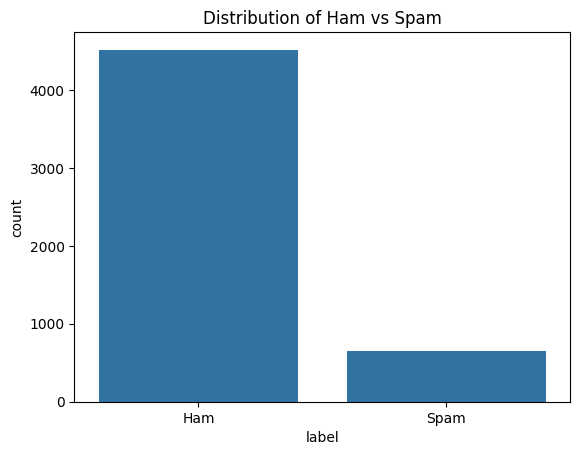

✅ Accuracy: 0.97678916827853

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       889
           1       1.00      0.83      0.91       145

    accuracy                           0.98      1034
   macro avg       0.99      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034



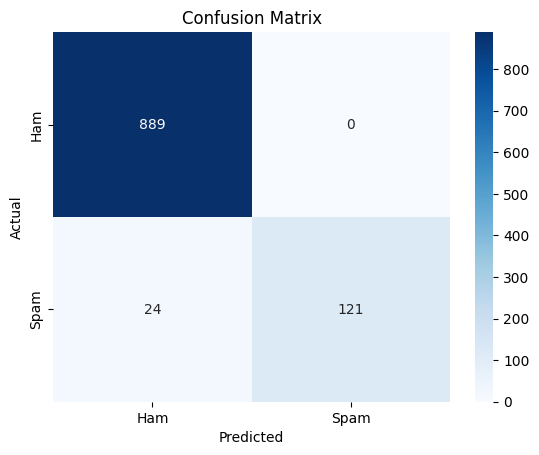


Message: Congratulations! You've won a free ticket to Bahamas. Call now!
→ Prediction: Spam

Message: Can we meet for lunch tomorrow?
→ Prediction: Ham


In [12]:
# 📂 Step 2: Load Dataset
df = pd.read_csv("spam.csv", encoding='latin-1')

# Keep only relevant columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

df.head()
# 🔍 Step 3: Data Preprocessing

# Encode labels (ham = 0, spam = 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Check nulls and duplicates
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Basic EDA
print("Total messages:", len(df))
print("Spam messages:", df['label'].sum())
sns.countplot(x='label', data=df)
plt.title("Distribution of Ham vs Spam")
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.show()

# ✂️ Step 4: Feature Extraction with TF-IDF
X = df['message']
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 🧠 Step 5: Train Model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# 📊 Step 6: Model Evaluation
y_pred = model.predict(X_test_tfidf)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 🔎 Step 7: Test on Custom Input
custom_sms = ["Congratulations! You've won a free ticket to Bahamas. Call now!",
              "Can we meet for lunch tomorrow?"]
custom_tfidf = vectorizer.transform(custom_sms)

predictions = model.predict(custom_tfidf)

for i, msg in enumerate(custom_sms):
    label = 'Spam' if predictions[i] == 1 else 'Ham'
    print(f"\nMessage: {msg}\n→ Prediction: {label}")

